<a href="https://colab.research.google.com/github/Epilef86/DNC/blob/main/Walmart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [41]:
df = pd.read_csv('/content/Walmart.csv')
display(df)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [42]:
# Contagem de feriados e dias normais
df['Holiday_Flag'].value_counts()

0    5985
1     450
Name: Holiday_Flag, dtype: int64

In [43]:
#Calcula a soma das vendas dos feriados 
df[df['Holiday_Flag'] == 1]['Weekly_Sales'].sum()

505299551.56

In [44]:
#Calcula a soma das vendas dnos dias normais
df[df['Holiday_Flag'] == 0]['Weekly_Sales'].sum()

6231919435.55

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [46]:
#Mudando a formatação da coluna data, o Y é maiusculo
df['Date'] = pd.to_datetime(df['Date'])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [47]:
df['month'] = df['Date'].dt.month
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,month
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,5
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,12
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,5
...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,9
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,5
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,12
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,10


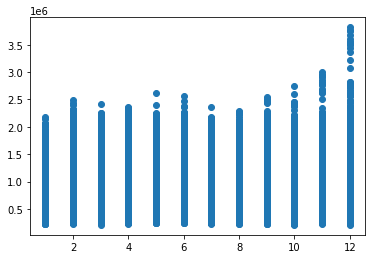

In [48]:
#Gráfico de dispersão ou scatter  
x = df['month']
y = df['Weekly_Sales']
plt.scatter(x,y)
plt.show()

In [49]:
df.groupby(['month','Holiday_Flag'])['Fuel_Price'].mean()

month  Holiday_Flag
1      0               3.330407
2      0               3.208756
3      0               3.409254
4      0               3.493933
5      0               3.394745
6      0               3.441204
7      0               3.294631
       1               3.842556
8      0               3.389887
9      0               3.394643
       1               3.681956
10     0               3.381836
       1               3.111078
11     0               3.347211
       1               3.171556
12     0               3.240014
       1               3.004437
Name: Fuel_Price, dtype: float64

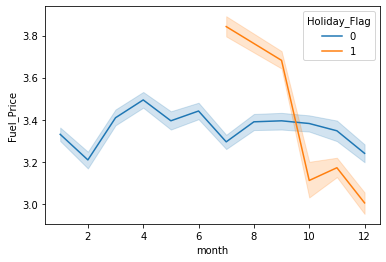

In [50]:
sns.lineplot(data=df, x='month', y='Fuel_Price', hue='Holiday_Flag')
plt.show()

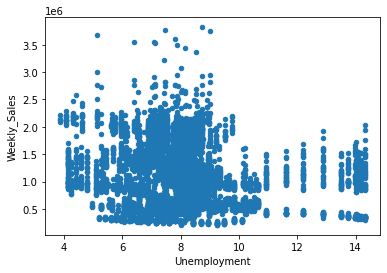

In [56]:
df.plot.scatter(x='Unemployment', y='Weekly_Sales'); 

In [ ]:
#Gráfico de dispersão ou scatter  
x = df['month']
y = df['Weekly_Sales']
plt.scatter(x,y)
plt.show()